<font size="5">Graph K-Coloring problem by Genetic Algorithm</font>

In [2]:
import numpy as np 
import igraph as ig
import random
import matplotlib.pyplot as plt
import math

In [387]:
# Some constants
# K: the number of colors
# N: the number of nodes
# nb_edges: number of 1
# colors: a color list
N = 10
nb_edges = 30
colors = ['grey',"misty rose","lime green","royal blue","red","yellow","purple","orange","brown","blue","green","w","navy","olive","lightcyan","lightblue","teal"]
len(colors)

17

<font size="4">6 steps</font>

<font size ="4" color="brown">Step1: Randomly generate a N*N Symmetrical binary matrix and plot the graph</font>

In [388]:
## Generate graph with N vertices and nb_edges edges
def create_graph(N,nb_edges):
    g = ig.Graph()
    g.add_vertices(N)

    ## Now generate random edges
    RandEdges = []
    while len(RandEdges) < nb_edges:
        RandEdge = random.sample(range(N), 2)
        rev_RandEdge = [RandEdge[1],RandEdge[0]]
        if RandEdge not in RandEdges and rev_RandEdge not in RandEdges:
            RandEdges.append(RandEdge)
    g.add_edges(RandEdges)
    # ig.plot(g)
    # print(g1)
    return g

In [3]:
RandEdge = random.sample(range(10), 2)

In [4]:
RandEdge

[1, 4]

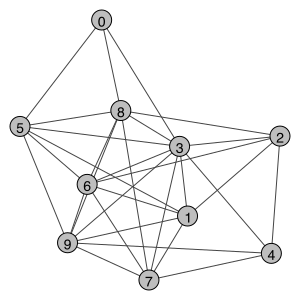

In [389]:
g1 = create_graph(N,nb_edges)

g1.vs['value'] = [0] * N
visual_style={}
# visual_style['layout'] =g1.layout_circle()
visual_style['layout'] =g1.layout_kamada_kawai()
visual_style['bbox'] = (300,300)
visual_style['vertex_color'] = [colors[i] for i in g1.vs['value']]
visual_style["vertex_label"] = [i for i in range(0,N)]
ig.plot(g1,**visual_style)

In [390]:
# choose K colors, K >= max_degree
max_degree = max(g1.degree())
print('max_degree = {}'.format(max_degree))
K = max_degree
print('So we have to choose at least {} colors'.format(K))

max_degree = 9
So we have to choose at least 9 colors


<font size="4" color="brown">Step2: Define a function to create initial population</font>

In [391]:
# generate a ramdom array with range(1,K+1),size is N*N
def initial_population(K,N):
    arr = np.random.randint(low = 1,high=K+1, size=(N,N))
    return arr
ini_pop = initial_population(K,N)
ini_pop

array([[5, 8, 4, 8, 5, 8, 5, 5, 8, 2],
       [3, 4, 6, 8, 7, 1, 4, 6, 7, 8],
       [4, 4, 6, 6, 7, 9, 4, 5, 2, 7],
       [6, 3, 4, 5, 1, 2, 4, 5, 1, 7],
       [8, 2, 2, 7, 5, 6, 4, 6, 7, 2],
       [2, 1, 2, 6, 6, 1, 2, 2, 5, 3],
       [9, 9, 7, 9, 9, 4, 2, 5, 3, 6],
       [3, 2, 8, 9, 1, 8, 9, 2, 6, 8],
       [6, 3, 8, 1, 5, 1, 3, 9, 7, 3],
       [6, 5, 9, 6, 3, 4, 1, 7, 1, 2]])

<font size="4" color="brown">Step3: Define a fitness function with conditions to determine the optimal solution</font>

In [392]:
# if the elements in the matrix are labeled with 1 
#and the colors on the two vertices are same
# then the fitness score increases by one
# the solution with lowest finess score is considered as the optimal solution
# the number of edges which has two same colored vertices


<font size=4>Fitness score1</font>

In [393]:
# calculate the fitness score for one solution
def fitness_score1(g,solution):
    score = 0
    # iterate all the edges in the graph g
    for es in g.es:
        source_vs_id = es.source
        target_vs_id = es.target
        if(solution[source_vs_id]==solution[target_vs_id]):
            score = score + 1
    return score

<font size=4>Fitness score2</font>

In [394]:
def fitness_score2(g,solution):
    score = 0
    # iterate all the edges in the graph g
    for es in g.es:
        source_vs_id = es.source
        target_vs_id = es.target
        if(solution[source_vs_id]==solution[target_vs_id]):
            score = score + g.vs[source_vs_id].degree()+g.vs[target_vs_id].degree()
    return score

In [395]:
# calculate the fitness scores for the initial population
def fitness_scores1(g,ini_pop):
    scores = []
    for s in ini_pop:
        score = fitness_score1(g,s)
        scores.append(score)
    return scores

def fitness_scores2(g,ini_pop):
    scores = []
    for s in ini_pop:
        score = fitness_score2(g,s)
        scores.append(score)
    return scores

In [396]:
scores1 =fitness_scores1(g1,ini_pop)
scores2 =fitness_scores2(g1,ini_pop)
print("scores1:{} \nscores2:{}".format(scores1,scores2))

scores1:[7, 2, 3, 2, 3, 4, 3, 3, 4, 2] 
scores2:[94, 29, 38, 27, 40, 50, 40, 41, 55, 26]


<font size="4">Selection: select the top 2 from initial population</font>

In [397]:
def selection(g,scores):
    top1 = []
    top2 = []
    scores1 = scores.copy()
    for i in range(2):
        min_score = min(scores1)
        while min_score in scores1:
            index = scores1.index(min_score)
            scores1[index]=np.inf
            if i ==0:
                top1.append(index)
            else:
                top2.append(index)
    return top1,top2

In [398]:
top1_1,top1_2 = selection(g1,scores1)
print("in scores1:\ntop1:{}\ntop2:{}".format(top1_1,top1_2))
top2_1,top2_2 = selection(g1,scores2)
print("in scores2:\ntop1:{}\ntop2:{}".format(top2_1,top2_2))

in scores1:
top1:[1, 3, 9]
top2:[2, 4, 6, 7]
in scores2:
top1:[9]
top2:[3]


In [399]:
# Define a plot function to plot the optimal solution on the graph
def solotion_plot(g,solution,i):
    g.vs['value'] = solution
    visual_style['vertex_color'] = [colors[i] for i in g.vs['value']]
    visual_style["vertex_label"] = [i for i in range(0,N)]
    # print(solution)
    ig.plot(g,"solution{}.pdf".format(i),**visual_style)

<font size ="4" color="brown">Step4: define a crossover and mutation function</font>

<font size="3">Method1: Element cross over</font>

In [452]:
def element_cross(scores,ini_pop,ini_pop_index1,ini_pop_index2,fitness_scores):
    score1 = scores[ini_pop_index1]
    score2 = scores[ini_pop_index2]
    s_small = min(score1,score2)
    ini_pop1 = ini_pop[ini_pop_index1]
    ini_pop2 = ini_pop[ini_pop_index2]
    ini_pops = [ini_pop1,ini_pop2]
    solutions = []
    solutions.append(ini_pops)
    s_smalls = []
    s_smalls.append(s_small)
    i=nb_edges*10
    # When fitness score = 0 or iteration=100 stop
    while s_small !=0 and i !=0:
        i = i - 1
        # genrage a radom integer in range(N)
        p = random.randint(0,N-1)
        # element crossover
        temp = ini_pops[0][p]
        ini_pops[0][p] = ini_pops[1][p]
        ini_pops[1][p] = temp
        s = fitness_scores(g1,ini_pops)
        solutions.append(ini_pops)
        s_small = min(s)
        s_smalls.append(s_small)
        if s_small ==0:
            index=s.index(0)
            # solotion_plot(g1,ini_pops[index],i)
            # print("solution{} is:{}".format(nb_edges*10-i,ini_pops[index]))
    nb_iteration = nb_edges*10-i    
    return s_smalls, solutions,nb_iteration 

In [453]:
def find_solution(scores,ini_pop,top1,top2,cross_function,fitness_scores):
    solution_all = []
    nb_solution = 0
    min_iteration = 0
    avg_iteration = 0
    if scores[top1[0]] == 0:
        for i in top1:
            solution = ini_pop[i]
            # solotion_plot(g1,solution,i)
            solution_all.append(solution)
            nb_solution +=1
        # print("we find {} solutions totally!".format(nb_solution))
    else:
        top = top1+top2
        index = -1
        iterations = []
        for i in range(len(top)-1):
            for j in range(i+1,len(top)):
                s_smalls, solutions, nb_iteration=cross_function(scores,ini_pop,top[i],top[j],fitness_scores)
                if 0 in s_smalls:
                    nb_solution +=1
                solution_all.append(solutions)
                iterations.append(nb_iteration)
                index = index+1
                # print("I choose ini_pop{} and ini_pop{}".format(top[i],top[j]))
                # print("it's solution{}".format(index))
                # print(s_smalls)
                # plt.plot(s_smalls)
                # plt.show()
        # calculate the minimum iterations for finding the solution and average iterations for scores1 and scores2
        min_iteration = min(iterations)
        # print("The minimum iterations for finding the solution is:{}".format(min_iteration))
        avg_iteration = sum(iterations)/len(iterations)
        # print("The average iterations for finding the solution is:{}".format(avg_iteration))
        # print("We find {} solutions totally!".format(nb_solution))
    return solution_all,min_iteration,avg_iteration,nb_solution

In [449]:
solution_all1,min_iteration1,avg_iteration1,nb_solutions1=find_solution(scores1,ini_pop,top1_1,top1_2,element_cross,fitness_scores1)

In [ ]:
solution_all2,min_iteration2,avg_iteration2,nb_solutions2=find_solution(scores2,ini_pop,top1_1,top1_2,element_cross,fitness_scores2)

In [454]:
def run_program(N,nb_edges):
    g = create_graph(N,nb_edges)
    K = max(g.degree())
    ini_pops = initial_population(K,N)
    scores1 =fitness_scores1(g,ini_pops)
    scores2 =fitness_scores2(g,ini_pops)
    top1_1,top1_2 = selection(g1,scores1)
    top2_1,top2_2 = selection(g1,scores2)  
    solution_all1,min_iteration1,avg_iteration1,nb_solutions1=find_solution(scores1,ini_pops,top1_1,top1_2,element_cross,fitness_scores1)
    solution_all2,min_iteration2,avg_iteration2,nb_solutions2=find_solution(scores2,ini_pops,top1_1,top1_2,element_cross,fitness_scores2)
    return min_iteration1,min_iteration2,avg_iteration1,avg_iteration2,nb_solutions1,nb_solutions2


In [455]:
# run the program 100 times
import time
min_iteration1s = []
min_iteration2s = []
avg_iteration1s = []
avg_iteration2s = []
nb_solution1s = []
nb_solution2s = []
times = []
for i in range(100):
    start_time = time.time()
    min_iteration1,min_iteration2,avg_iteration1,avg_iteration2,nb_solution1,nb_solution2 = run_program(1000,9000)
    end_time = time.time()
    t = end_time-start_time
    times.append(t)
    min_iteration1s.append(min_iteration1)
    min_iteration2s.append(min_iteration2)
    avg_iteration1s.append(avg_iteration1)
    avg_iteration2s.append(avg_iteration2)
    nb_solution1s.append(nb_solutions1)
    nb_solution2s.append(nb_solutions2)
avg_min_ite1 = sum(min_iteration1s)/len(min_iteration1s)
avg_min_ite2 = sum(min_iteration2s)/len(min_iteration2s)
avg_avg_ite1 = sum(avg_iteration1s)/len(avg_iteration1s)
avg_avg_ite2 = sum(avg_iteration2s)/len(avg_iteration2s)
avg_nb_s1 = sum(nb_solution1s)/len(nb_solution1s)
avg_nb_s2 = sum(nb_solution2s)/len(nb_solution2s)
print("The average excution time:{}".format(sum(times)/len(times)))

The average excution time:10.198019361495971


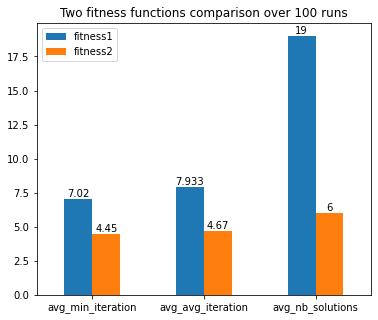

In [456]:
import pandas as pd
x = ['avg_min_iteration','avg_avg_iteration','avg_nb_solutions']
y1 = [avg_min_ite1,avg_avg_ite1,avg_nb_s1]
y2 = [avg_min_ite2,avg_avg_ite2,avg_nb_s2]
df = pd.DataFrame({

        "fitness1":y1,

        "fitness2":y2},

        index=x)
ax=df.plot(kind="bar",figsize=(6,5),rot=0,title='Two fitness functions comparison over 100 runs')
for container in ax.containers:
    ax.bar_label(container)

<font size="3">Method2: single-point cross over</font>

In [261]:
# def single_cross(ini_pop_index1,ini_pop_index2):
#     score1 = scores[ini_pop_index1]
#     score2 = scores[ini_pop_index2]
#     s_small = min(score1,score2)
#     ini_pop1 = ini_pop[ini_pop_index1]
#     ini_pop2 = ini_pop[ini_pop_index2]
#     ini_pops = [ini_pop1,ini_pop2]
#     solutions = []
#     solutions.append(ini_pops)
#     s_smalls = []
#     s_smalls.append(s_small)
#     i=300
#     # When fitness score = 0 or iteration = 100 stop
#     while s_small !=0 and i !=0:
#         i = i-1
#         # genrage a radom integer in range(N)
#         p = random.randint(0,N-1)
#         # single-point crossover
#         if p >= N/2:
#             temp = ini_pops[0][p:]
#             ini_pops[0][p:] = ini_pops[1][p:]
#             ini_pops[1][p:] = temp
#             scores1 = fitness_scores(g1,ini_pops)
#             solutions.append(ini_pops)
#             s_small = min(scores1)
#             s_smalls.append(s_small)
#         else:
#             temp = ini_pops[0][:p]
#             ini_pops[0][:p] = ini_pops[1][:p]
#             ini_pops[1][:p] = temp
#             scores1 = fitness_scores(g1,ini_pops)
#             solutions.append(ini_pops)
#             s_small = min(scores1)
#             s_smalls.append(s_small)
#     return  s_smalls, solutions

In [262]:
# find_solution(top1,top2,single_cross)

<font size="3">Method3: two-point cross over</font>

In [263]:
# def two_point_cross(ini_pop_index1,ini_pop_index2):
#     score1 = scores[ini_pop_index1]
#     score2 = scores[ini_pop_index2]
#     s_small = min(score1,score2)
#     ini_pop1 = ini_pop[ini_pop_index1]
#     ini_pop2 = ini_pop[ini_pop_index2]
#     ini_pops = [ini_pop1,ini_pop2]
#     solutions = []
#     solutions.append(ini_pops)
#     s_smalls = []
#     s_smalls.append(s_small)
#     i=300
    
#     # When fitness score = 0, stop
#     while s_small !=0 and i != 0:
#         i = i-1
#         # genrage a radom integer in range(N)
#         p1 = random.randint(N/2,N-1)
#         p2 = random.randint(0,N/2)
#         # two_point_cross crossover
#         temp1 = ini_pops[0][p1:]
#         ini_pops[0][p1:] = ini_pops[1][p1:]
#         ini_pops[1][p1:] = temp1
#         temp2 = ini_pops[0][:p2]
#         ini_pops[0][:p2] = ini_pops[1][:p2]
#         ini_pops[1][:p2] = temp2
#         scores1 = fitness_scores(g1,ini_pops)
#         solutions.append(ini_pops)
#         s_small = min(scores1)
#         s_smalls.append(s_small)
#     return  s_smalls, solutions

<font size="4" color="brown">Step5: Define a plot function to plot the optimal solution on the graph</font>

In [ ]:
# def solotion_plot(g,s):
#     visual_style['vertex_color'] = [colors[i] for i in g.vs['value']]
#     ig.plot(g,"solution{}.pdf".format(i),**visual_style)

<font size="4" color="brown">Step6: Set the genetic algorithm options, output and stopping criteria</font>

In [ ]:
# for example: When fitness score = 0